# surrogate gradient

<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_4513/3816639502.py:29: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, yd, linewidth=2, label='$\partial{\\tilde{S}}/\partial{U}$', color='green')


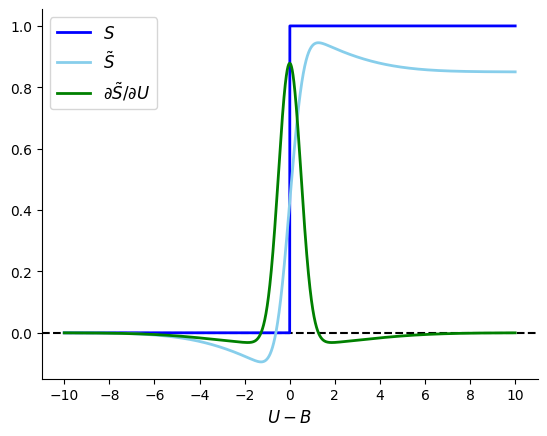

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import cumulative_trapezoid

lens = 0.5     # sigma
scale = 6.0    # s
hight = 0.15   # h (gamma)

def gaussian(x, mu=0.0, sigma=0.5):
    return np.exp(-((x - mu)**2) / (2 * sigma**2)) / np.sqrt(2 * math.pi) / sigma

x = np.linspace(-10, 10, 5000)

# y = x.gt(0).float()
y = (x > 0).astype(np.float32)

yd = gaussian(x, mu=0.0, sigma=lens) * (1.0 + hight) \
    - gaussian(x, mu=lens, sigma=scale * lens) * hight \
    - gaussian(x, mu=-lens, sigma=scale * lens) * hight
# yd_int = np.cumsum(yd) * (x[1] - x[0])
yd_int = cumulative_trapezoid(yd, x, initial=0)


# Add horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)


plt.plot(x, y, linewidth=2, label='$S$', color='blue')
plt.plot(x, yd_int, linewidth=2, label='$\\tilde{S}$', color='skyblue')
plt.plot(x, yd, linewidth=2, label='$\partial{\\tilde{S}}/\partial{U}$', color='green')


plt.xlabel('$U-B$', fontsize=12)
# plt.grid(True)
plt.legend(fontsize=12)
plt.xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
plt.yticks([0,0.2,0.4,0.6,0.8,1])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('images/surrogate.pdf', format='pdf', bbox_inches='tight')

# smooth test

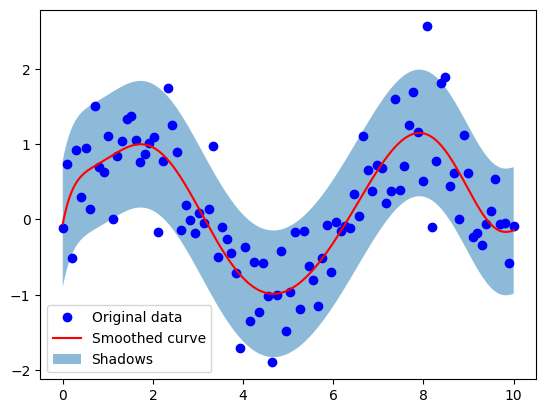

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some noisy data
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.random.randn(100)

# Fit a polynomial to the data
z = np.polyfit(x, y, 10)

# Generate the smoothed curve
x_smooth = np.linspace(0, 10, 1000)
y_smooth = np.polyval(z, x_smooth)

# Calculate the upper and lower shadows
y_upper = y_smooth + np.std(y) #* 0.5
y_lower = y_smooth - np.std(y) #* 0.5

# Plot the original data and the smoothed curve with shadows
plt.plot(x, y, 'bo', label='Original data')
plt.plot(x_smooth, y_smooth, 'r-', label='Smoothed curve')
plt.fill_between(x_smooth, y_lower, y_upper, alpha=0.5, label='Shadows')
plt.legend()
plt.show()

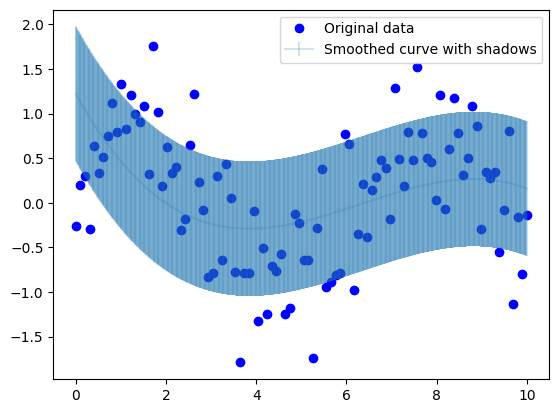

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some noisy data
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.random.randn(100)

# Fit a polynomial to the data
z = np.polyfit(x, y, 3)

# Generate the smoothed curve
x_smooth = np.linspace(0, 10, 1000)
y_smooth = np.polyval(z, x_smooth)

# Calculate the upper and lower shadows
y_upper = y_smooth + np.std(y)
y_lower = y_smooth - np.std(y)

# Plot the original data and the smoothed curve with error bars
plt.plot(x, y, 'bo', label='Original data')
plt.errorbar(x_smooth, y_smooth, yerr=[y_smooth - y_lower, y_upper - y_smooth], alpha=0.2, label='Smoothed curve with shadows')
plt.legend()
plt.show()

# visualize errors and losses

In [1]:
def smooth(scalars, weight=0.8):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1.0 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

## int. path error

([<matplotlib.axis.YTick at 0x7f00387dea50>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1')])

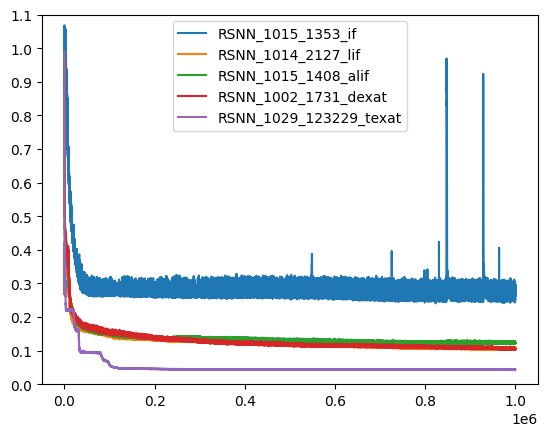

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

dir = '/home/grl/grid_cell/sorscher_pattern_formation/models/RSNN/'

err_paths = [
    'RSNN_1015_1353_if',
    'RSNN_1014_2127_lif',
    'RSNN_1015_1408_alif',
    'RSNN_1002_1731_dexat',
    # 'RSNN_1012_1512_texat',
    'RSNN_1029_123229_texat',
]
# print('\n'.join(map(str, err_paths)))

for err_path in err_paths:
    err_path_full = os.path.join(dir, err_path)
    err_path_full = os.path.join(err_path_full, 'err.npy')
    
    err = np.load(err_path_full)
    err_smoothed = smooth(err, weight=0.95)

    # plt.plot(err)
    plt.plot(err_smoothed, label=err_path)

plt.legend()
# plt.grid(True)

# plt.xlim([0, 500e3])
# plt.xlim([900e3, 1000e3])
plt.ylim([0, 1.1])
plt.yticks([i * 0.1 for i in range(12)])


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

dir = '/home/grl/grid_cell/sorscher_pattern_formation/models/RSNN/'
paths = [
    'RSNN_1015_1353_if',
    'RSNN_1014_2127_lif',
    'RSNN_1015_1408_alif',
    'RSNN_1002_1731_dexat',
    'RSNN_1029_123229_texat',
]

for path in paths:
    path_full = os.path.join(dir, path)
    err_path_full = os.path.join(path_full, 'err.npy')
    loss_path_full = os.path.join(path_full, 'loss.npy')
    
    err = np.load(err_path_full)
    loss = np.load(loss_path_full)
    
    # err_smoothed = smooth(err, weight=0.95)
    
    print(path)
    print(err[-1])
    print(loss[-1])

RSNN_1015_1353_if
0.2687070539515131
6.1956634521484375
RSNN_1014_2127_lif
0.10082694003654419
6.188002109527588
RSNN_1015_1408_alif
0.11145721374680087
6.188369274139404
RSNN_1002_1731_dexat
0.1019461905664456
6.187941551208496
RSNN_1029_123229_texat
0.04375660893775543
6.146806716918945


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

dir = '/home/grl/grid_cell/sorscher_pattern_formation/models/'
paths = [
    'LSTM/LSTM_0904_2210',
    # 'LSTM/LSTM_0904_2215',
    'RNN/RNN_0904_2100',
]

for path in paths:
    path_full = os.path.join(dir, path)
    err_path_full = os.path.join(path_full, 'err.npy')
    loss_path_full = os.path.join(path_full, 'loss.npy')
    
    err = np.load(err_path_full)
    loss = np.load(loss_path_full)
    
    # err_smoothed = smooth(err, weight=0.95)
    
    print(path)
    print(err[-1])
    print(loss[-1])

LSTM/LSTM_0904_2210
0.05876153155837115
6.18462610244751
RNN/RNN_0904_2100
0.04517937656290765
6.1592326164245605


## cross-entropy loss

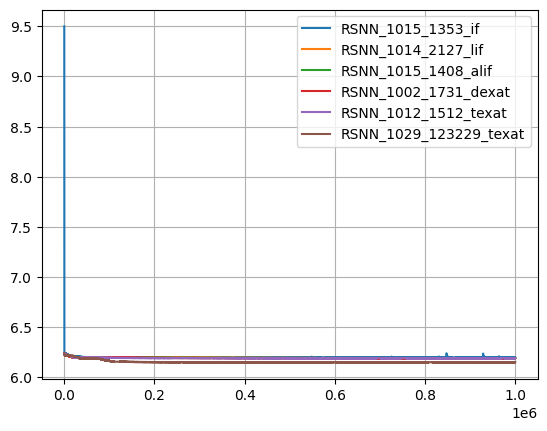

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

dir = '/home/grl/grid_cell/sorscher_pattern_formation/models/RSNN/'

err_paths = [
    'RSNN_1015_1353_if',
    'RSNN_1014_2127_lif',
    'RSNN_1015_1408_alif',
    'RSNN_1002_1731_dexat',
    'RSNN_1012_1512_texat',
    
    'RSNN_1029_123229_texat',
]
# print('\n'.join(map(str, err_paths)))

for err_path in err_paths:
    err_path_full = os.path.join(dir, err_path)
    err_path_full = os.path.join(err_path_full, 'loss.npy')
    
    err = np.load(err_path_full)
    err_smoothed = smooth(err, weight=0.95)

    plt.plot(err_smoothed, label=err_path)

plt.legend()
plt.grid(True)

# plt.ylim([6.18, 6.20])  # loss
# plt.ylim([6.18, 6.24])  # loss

# density visualization for grid scales

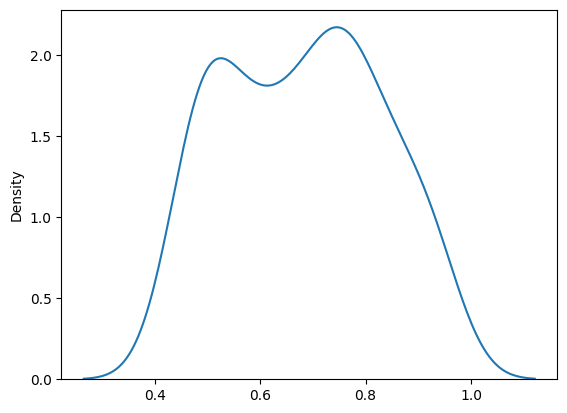

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
data1 = np.random.uniform(0.44, 0.95, 100)
data1 = data1.tolist()

data2 = np.random.randn(200)
data2 = data2.tolist()

res = sns.kdeplot(data1)

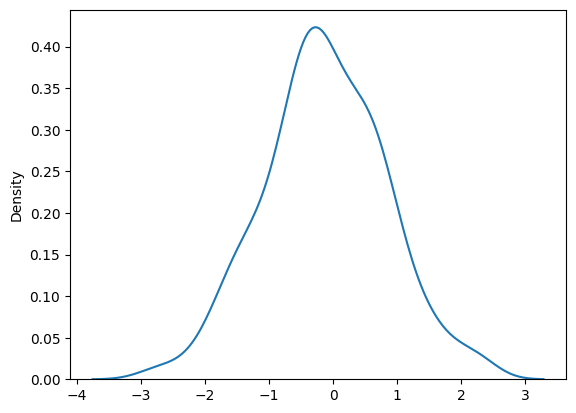

In [43]:
res = sns.kdeplot(data2)

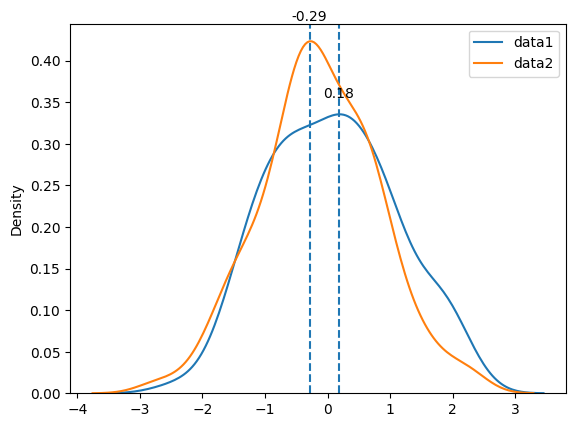

In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# np.random.seed(0)
# data1 = np.random.normal(0, 2.5, 100)
# data2 = np.random.normal(1, 1.5, 100)
data = [data1, data2]
labels = ['data1', 'data2']

for i in range(2):
    # sns.histplot(data=grid_scales[i], legend=True, label=labels[i])
    if i == 0:
        ax = sns.kdeplot(data=data[i], legend=True, label=labels[i])
    else:
        sns.kdeplot(data=data[i], ax=ax, legend=True, label=labels[i])
    
    x = ax.get_lines()[-1].get_xdata()
    y = ax.get_lines()[-1].get_ydata()
    x_max = x[np.argmax(y)]
    ax.axvline(x=x_max, linestyle='--')
    ax.text(x=x_max, y=ax.get_ylim()[1], 
            s=f'{x_max:.2f}', ha='center', va='bottom')
    
plt.legend()
plt.show()

610


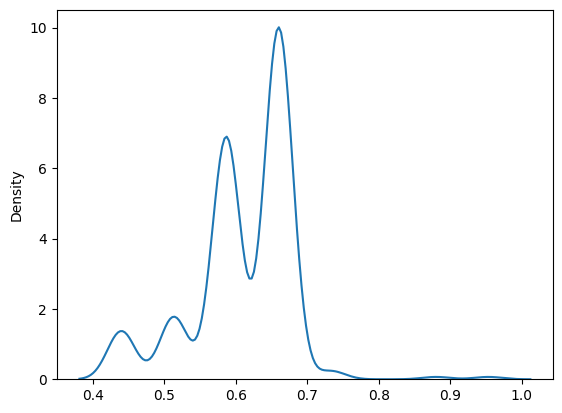

In [49]:
import numpy as np

scale = np.load('scale.npy').tolist()
print(len(scale))

res = sns.kdeplot(scale)

<Axes: ylabel='Count'>

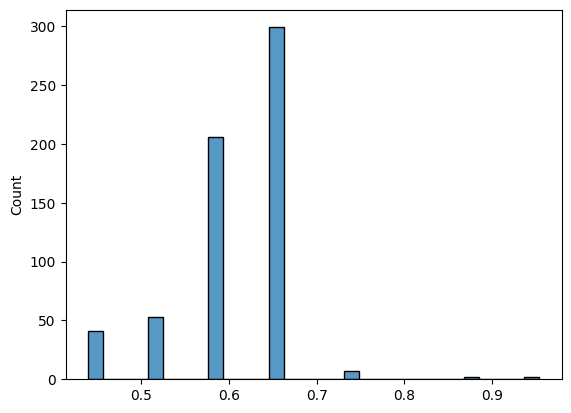

In [60]:
sns.histplot(scale)

(array([ 41.,  53., 206.,   0., 299.,   7.,   0.,   0.,   2.,   2.]),
 array([0.44      , 0.49133333, 0.54266667, 0.594     , 0.64533333,
        0.69666667, 0.748     , 0.79933333, 0.85066667, 0.902     ,
        0.95333333]),
 <BarContainer object of 10 artists>)

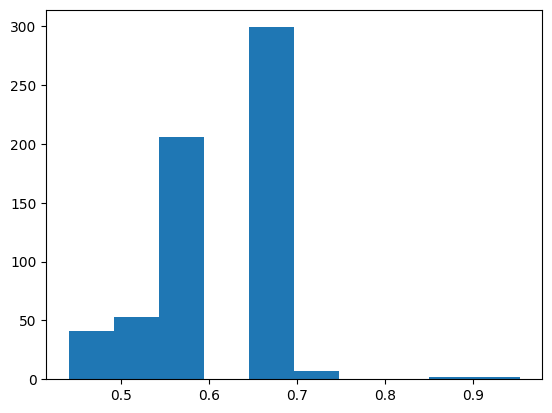

In [55]:
plt.hist(scale)

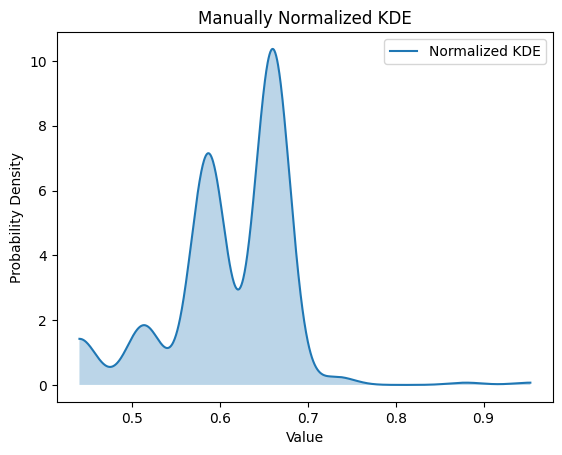

In [57]:
from scipy.stats import gaussian_kde

# Compute KDE manually
kde = gaussian_kde(scale)
x_vals = np.linspace(min(scale), max(scale), 1000)
kde_vals = kde(x_vals)

# Normalize to make the area under the curve equal to 1
kde_vals /= (kde_vals.sum() * (x_vals[1] - x_vals[0]))

# Plot normalized KDE
plt.plot(x_vals, kde_vals, label="Normalized KDE")
plt.fill_between(x_vals, kde_vals, alpha=0.3)
plt.ylabel("Probability Density")
plt.xlabel("Value")
plt.title("Manually Normalized KDE")
plt.legend()
plt.show()


# othes tests

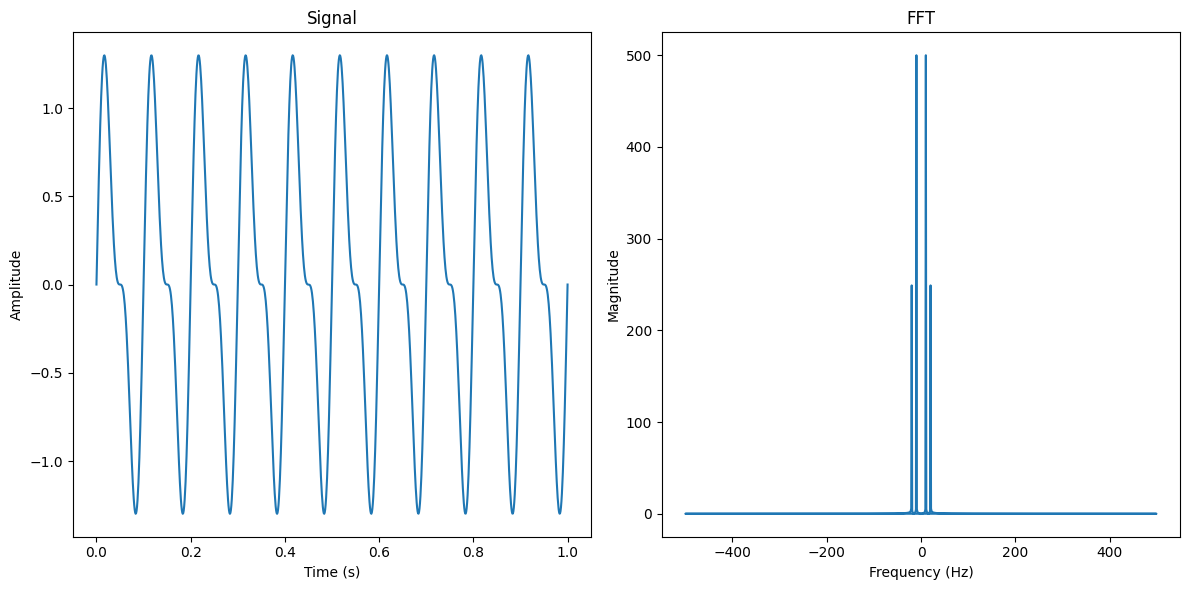

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a signal with a frequency of 10 Hz and a sampling rate of 100 Hz
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# Perform FFT on the signal
X = np.fft.fft(x)

# Get the frequencies corresponding to the FFT components
freq = np.fft.fftfreq(len(x), d=0.001)

# Plot the signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')

plt.subplot(122)
plt.plot(freq, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT')

plt.tight_layout()
plt.show()

In [28]:
import numpy as np

arr = np.random.rand(2, 3, 5)
print(arr.shape)
print(arr)

(2, 3, 5)
[[[0.75873229 0.9355274  0.02195073 0.69356009 0.81837706]
  [0.11648452 0.66459048 0.98677986 0.30603941 0.48102891]
  [0.77862783 0.18946986 0.41864867 0.82788889 0.80085321]]

 [[0.17774276 0.10743331 0.20970918 0.12722054 0.07101909]
  [0.42297876 0.36651973 0.16073004 0.34064939 0.85181875]
  [0.42054865 0.79124774 0.54869862 0.44574917 0.7066122 ]]]


In [32]:
# arr1 = arr[:, 10, None]
# arr1 = arr.ravel()
arr1 = arr[:, 1, 2]
arr1 = arr1.reshape(-1, 1, 1)

print(arr1.shape)
print(arr1)

(2, 1, 1)
[[[0.98677986]]

 [[0.16073004]]]


In [33]:
dists = np.linalg.norm(arr1 - arr, axis=0)
print(dists.shape)
print(dists)

(3, 5)
[[0.22868128 0.07394157 0.96607154 0.29512832 0.19080764]
 [0.90894905 0.38230276 0.         0.70411543 0.85638054]
 [0.33291588 1.01649191 0.6879627  0.32631618 0.57667673]]


origins=[[[12 12 12]
  [25 25 25]
  [37 37 37]]

 [[12 25 37]
  [12 25 37]
  [12 25 37]]]
25 37


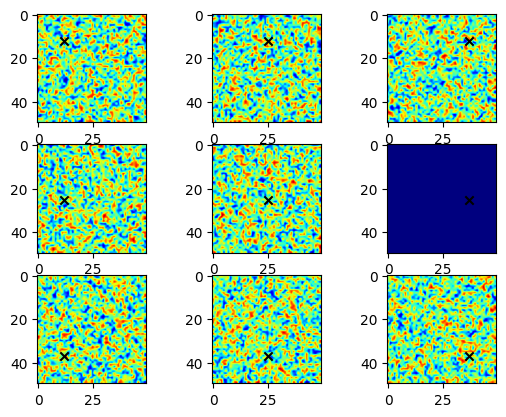

In [48]:
res = 50
origins = np.stack(np.mgrid[:3, :3] - 1) * res//4 + res//2
print(f'origins={origins}')

for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, 3*i + j + 1)
        if i == 1 and j == 2:
            im = np.zeros((res, res))
            plt.imshow(im, cmap='jet', interpolation='gaussian')
            print(origins[0,i,j], origins[1,i,j])
        else:
            im = np.random.rand(res, res)
            plt.imshow(im, cmap='jet', interpolation='gaussian')
        plt.scatter(origins[1,i,j], origins[0,i,j], marker='x', c='black')

In [4]:
import numpy as np

# a = np.arange(5, 14).reshape(3, 3)
# print(a)
print(np.ravel_multi_index((1, 2), (3, 3)))

5


In [7]:
import numpy as np

arr1 = np.random.rand(5, 2, 2)
arr2 = np.random.rand(5, 2, 2)
print(f'arr1={arr1}')
print(f'arr2={arr2}')

arr1=[[[0.20378646 0.15835345]
  [0.35502172 0.85228822]]

 [[0.58551094 0.65252255]
  [0.13106771 0.78651353]]

 [[0.37013138 0.9265629 ]
  [0.67727998 0.70431423]]

 [[0.69573589 0.57704363]
  [0.0576853  0.69633192]]

 [[0.50917646 0.56631944]
  [0.55141934 0.36441106]]]
arr2=[[[0.2433552  0.23480519]
  [0.0931051  0.99138193]]

 [[0.67752632 0.48320496]
  [0.54027    0.57503855]]

 [[0.97459227 0.78194024]
  [0.34516635 0.13299933]]

 [[0.20466798 0.30343446]
  [0.01228854 0.02561473]]

 [[0.65473692 0.49146236]
  [0.26067969 0.97211663]]]


In [8]:
dists = np.linalg.norm(arr1 - arr2, axis=0)
print(f'dists={dists}')

dists=[[0.79858689 0.36863884]
 [0.65797925 1.09983502]]


In [10]:
arr1 = arr1.reshape(5, -1)
arr2 = arr2.reshape(5, -1)
print(f'arr1.shape={arr1.shape}')
print(f'arr2.shape={arr2.shape}')
print(f'arr1={arr1}')
print(f'arr2={arr2}')

arr1.shape=(5, 4)
arr2.shape=(5, 4)
arr1=[[0.20378646 0.15835345 0.35502172 0.85228822]
 [0.58551094 0.65252255 0.13106771 0.78651353]
 [0.37013138 0.9265629  0.67727998 0.70431423]
 [0.69573589 0.57704363 0.0576853  0.69633192]
 [0.50917646 0.56631944 0.55141934 0.36441106]]
arr2=[[0.2433552  0.23480519 0.0931051  0.99138193]
 [0.67752632 0.48320496 0.54027    0.57503855]
 [0.97459227 0.78194024 0.34516635 0.13299933]
 [0.20466798 0.30343446 0.01228854 0.02561473]
 [0.65473692 0.49146236 0.26067969 0.97211663]]


In [11]:
dists = np.linalg.norm(arr1 - arr2, axis=0)
print(f'dists={dists}')

dists=[0.79858689 0.36863884 0.65797925 1.09983502]


In [12]:
np.max(dists)

1.0998350175082265

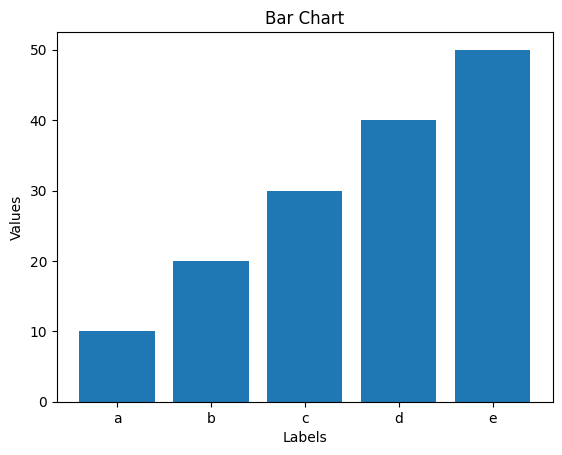

In [1]:
import matplotlib.pyplot as plt

# Define the scalars
a = 10
b = 20
c = 30
d = 40
e = 50

# Define the x labels
x_labels = ['a', 'b', 'c', 'd', 'e']

# Define the y values
y_values = [a, b, c, d, e]

# Create the bar chart
plt.bar(x_labels, y_values)

# Set the title and labels
plt.xlabel('Labels')
plt.ylabel('Values')

# Show the plot
plt.show()

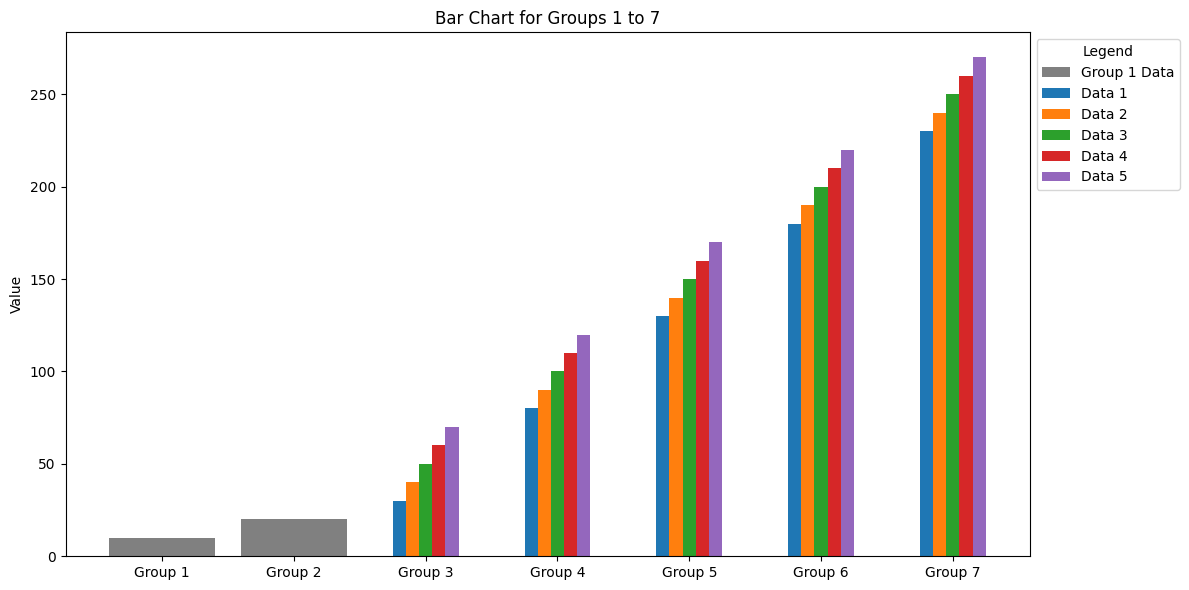

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
group1 = [10]
group2 = [20]
group3 = [30, 40, 50, 60, 70]
group4 = [80, 90, 100, 110, 120]
group5 = [130, 140, 150, 160, 170]
group6 = [180, 190, 200, 210, 220]
group7 = [230, 240, 250, 260, 270]

# Combine data into a list for easier processing
groups = [group1, group2, group3, group4, group5, group6, group7]

# X labels
x_labels = ["Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6", "Group 7"]

# Define the x-axis positions for each group
x = np.arange(len(groups))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Colors for each data point in groups 3 to 7
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Plot groups
for i, group in enumerate(groups):
    if i < 2:  # Groups 1 and 2 (single bar)
        ax.bar(x[i], group[0], color="gray", label=f"Group {i + 1} Data" if i == 0 else "")
    else:  # Groups 3 to 7 (multiple bars in the same group)
        for j, value in enumerate(group):  # Horizontal bars for each data point
            ax.bar(x[i] + j * 0.1 - 0.2, value, color=colors[j], width=0.1, label=f"Data {j + 1}" if i == 2 else "")

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(by_label.values(), by_label.keys(), title="Legend", loc="upper left", bbox_to_anchor=(1, 1))

# Add axis labels and title
ax.set_ylabel("Value")
ax.set_title("Bar Chart for Groups 1 to 7")

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
x0 = float('nan')
x1 = 5
x2 = 10
x = [x0, x1, x2]
np.isnan(x)

array([ True, False, False])

In [17]:
np.sort(x)

array([ 5., 10., nan])

In [19]:
x_no_nan = np.nan_to_num(x, nan=-np.inf)
x_no_nan

array([-inf,   5.,  10.])

In [20]:
np.sort(x_no_nan)

array([-inf,   5.,  10.])

In [4]:
import numpy as np

# grid_sort = np.flip(np.argsort(rate_maps[layer].score_60))

x = [0, -1, 5, 20, -4]

sort_idx = np.flip(np.argsort(x))
print(sort_idx)

x_sorted = [x[idx] for idx in sort_idx]
print(x_sorted)

[3 2 0 1 4]
[20, 5, 0, -1, -4]


In [7]:
import os

save_dir='models/RSNN/'
run_ID='RSNN_1029_1232_texat'

model_pth = os.path.join(save_dir, run_ID)
model_pth = os.path.join(model_pth, 'model_200.pth')

print(model_pth)
print(model_pth[-8:-4])

models/RSNN/RSNN_1029_1232_texat/model_200.pth
_200


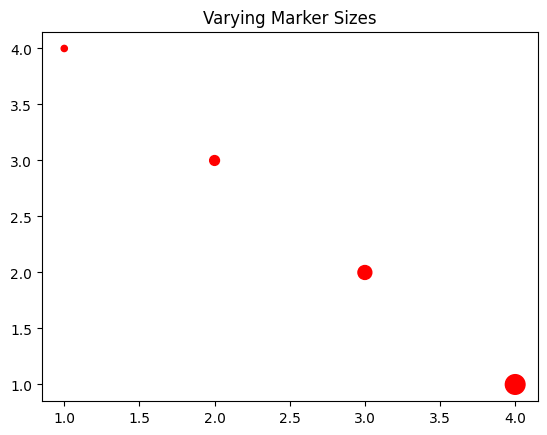

In [9]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [4, 3, 2, 1]
sizes = [20, 50, 100, 200]  # Different sizes for each marker

plt.scatter(x, y, s=sizes, c='red')  # Sizes vary for individual markers
plt.title("Varying Marker Sizes")
plt.show()

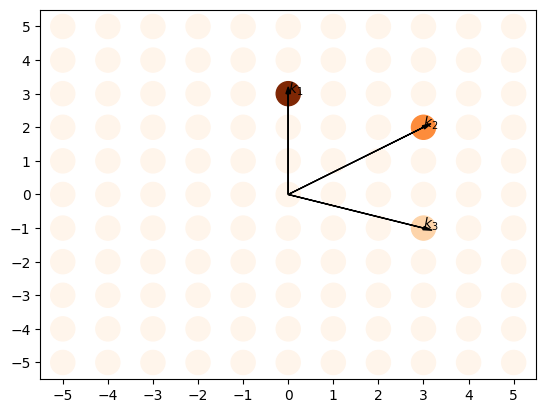

In [10]:
import matplotlib.pyplot as plt
import numpy as np

width = 6
idxs = np.arange(-width + 1, width)
x2, y2 = np.meshgrid(
    # np.arange(2*width - 1),
    # np.arange(2*width - 1),
    np.arange(-width+1, width),
    np.arange(-width+1, width),
)

k1 = [3,0]
k2 = [2,3]
k3 = [-1,3]

im = np.zeros((20, 20))
im[k1[0], k1[1]] = 1
im[k2[0], k2[1]] = 0.5
im[k3[0], k3[1]] = 0.23

plt.scatter(x2, y2, c=im[idxs][:, idxs], s=300, cmap='Oranges')

for i,k in enumerate([k1, k2, k3]):
    plt.arrow(0, 0, k[1], k[0], head_width=0.1, head_length=0.2, fc='k', ec='k')
    plt.annotate(f'$k_{i+1}$', xy=(k[1], k[0]), xytext=(k[1], k[0]), textcoords='data')


xticks = np.arange(-width+1, width)
yticks = np.arange(-width+1, width)
plt.xticks(xticks);
plt.yticks(yticks);

# in python, how to visualize a toroidal manifold state space via dimensionality reduction

1. Generate Toroidal Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# Generate a torus in 3D
n_samples = 1000
theta = np.random.uniform(0, 2 * np.pi, n_samples)
phi = np.random.uniform(0, 2 * np.pi, n_samples)

# Radii
R = 5  # Distance from the center of the tube to the center of the torus
r = 2  # Radius of the tube

# 3D coordinates of the torus
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

data = np.stack([x, y, z], axis=1)


2. Dimensionality Reduction

Option A: PCA

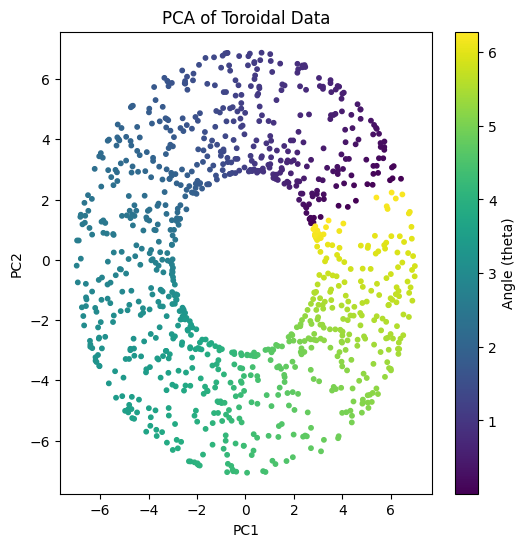

In [4]:
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot PCA result
plt.figure(figsize=(6, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=10, c=theta, cmap='viridis')
plt.title("PCA of Toroidal Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Angle (theta)")
plt.show()


# i want visualize a 3D toroidal manifold

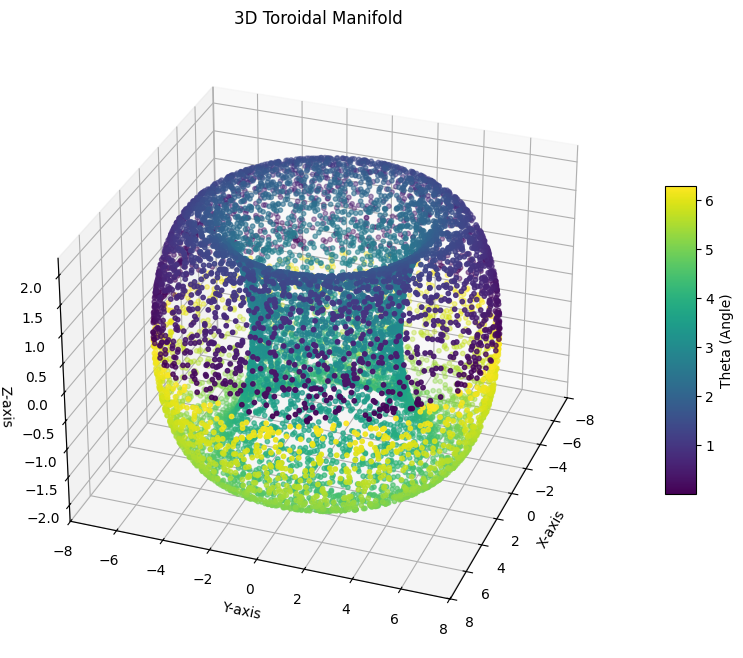

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
n_samples = 10000  # Number of points
R = 5             # Major radius (distance from the center of the torus to the tube center)
r = 2             # Minor radius (radius of the tube)

# Generate angles
theta = np.random.uniform(0, 2 * np.pi, n_samples)
phi   = np.random.uniform(0, 2 * np.pi, n_samples)

# Parametric equations for the torus
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# Plot the 3D torus
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=phi, cmap='viridis', s=10)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Theta (Angle)")

# Set labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.view_init(elev=30, azim=20)
ax.set_title("3D Toroidal Manifold")
plt.show()


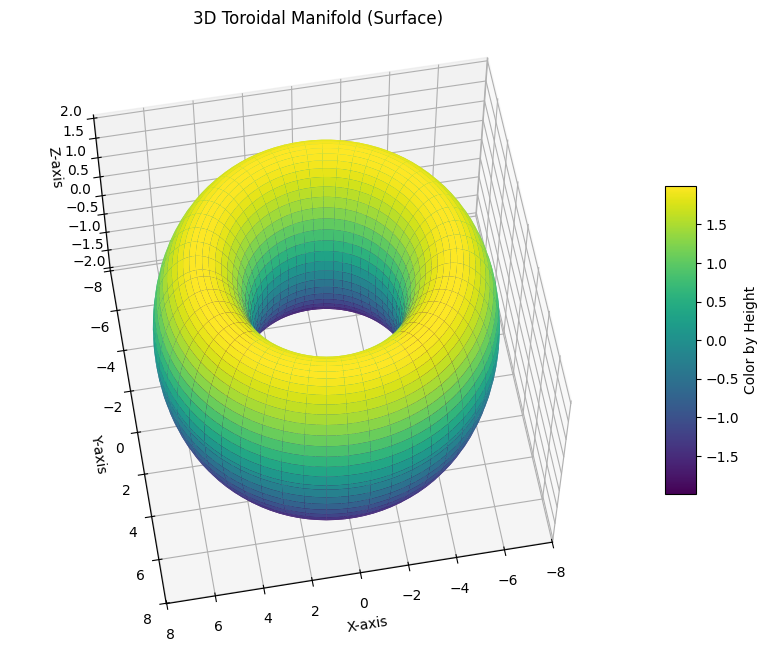

In [13]:
# Generate a grid of angles
theta = np.linspace(0, 2 * np.pi, 100)
phi   = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Parametric equations for the torus
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# Plot the 3D torus surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Add color bar
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Color by Height")

# Set labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.view_init(elev=60, azim=80)
ax.set_title("3D Toroidal Manifold (Surface)")
plt.show()


In [6]:
import random

a = 0 if random.random() < 0.5 else 1

print(a)

0


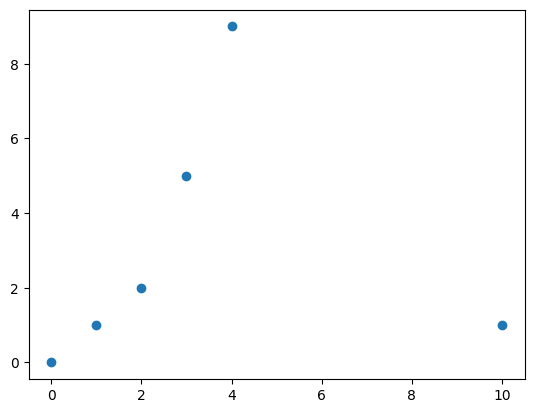

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, np.nan, 10]
y = [0, 1, 2, 5, 9, np.nan, 1]
plt.scatter(x, y)

# DoS test

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
c = np.array([-2,-1,0,1,2])  # Set c as a vector of three components
# sigma = 1.0  # Set standard deviation

# Define softmax function
def softmax(z):
    exp_z = np.exp(z)  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

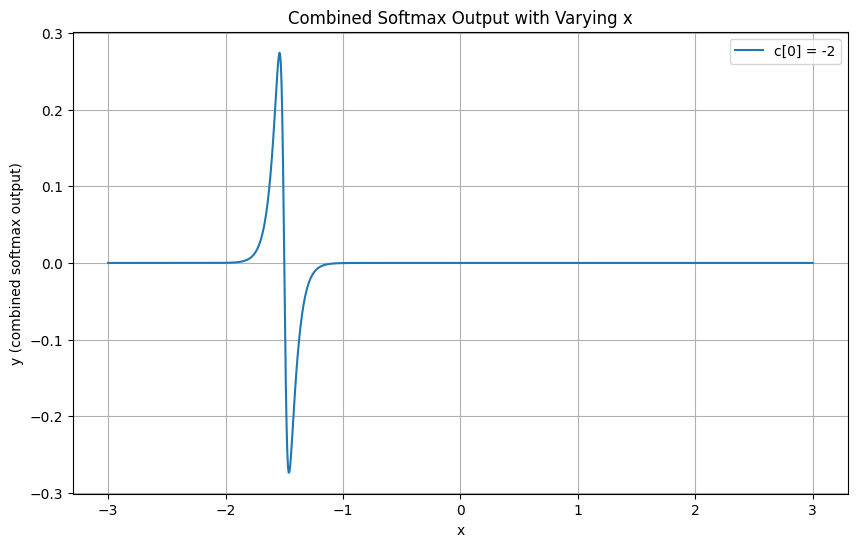

In [17]:
# Define parameters for sigma_e and sigma_i
sigma_e = 0.12  # Effective sigma
sigma_i = 0.24  # Inhibitory sigma

# Define a larger range of x
x = np.linspace(-3, 3, 1000)

# Compute the modified y values using both sigma_e and sigma_i
y = np.array([
    softmax(-np.array([(x_i - c_i)**2 for c_i in c]) / (2 * sigma_e**2)) -
    softmax(-np.array([(x_i - c_i)**2 for c_i in c]) / (2 * sigma_i**2))
    for x_i in x
])

# Plot results
plt.figure(figsize=(10, 6))
# for i in range(len(c)):
for i in range(1):
    plt.plot(x, y[:, i], label=f'c[{i}] = {c[i]}')

plt.title("Combined Softmax Output with Varying x")
plt.xlabel("x")
plt.ylabel("y (combined softmax output)")
plt.legend()
plt.grid()
plt.show()
